# Import Required Libraries

In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataset

In [2]:
heart_dataset = pd.read_csv('UCI Heart Disease Dataset.csv')
heart_dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0


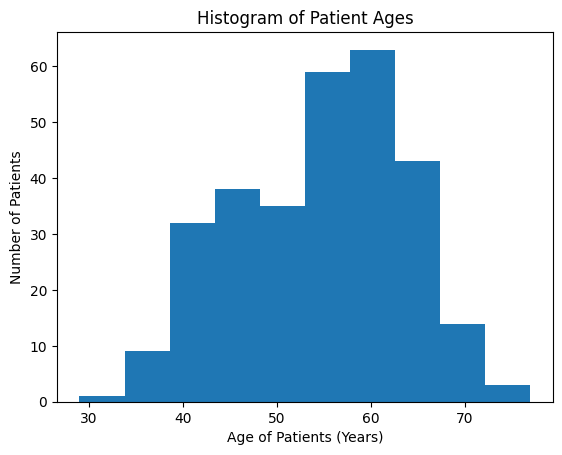

In [3]:
plt.hist(heart_dataset.age)
plt.title('Histogram of Patient Ages')
plt.xlabel('Age of Patients (Years)')
plt.ylabel('Number of Patients')
plt.show()

In [4]:
x = heart_dataset.drop('target', axis=1)
y = heart_dataset['target']
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0,2
293,45,1,1,110,264,0,0,132,0,1.2,2,0,2
294,68,1,4,144,193,1,0,141,0,3.4,2,2,2
295,57,1,4,130,131,0,0,115,1,1.2,2,1,2


## Data Preprocessing
- Feautre Scaling using standardization

In [5]:
scaling = StandardScaler()
x = scaling.fit_transform(x)
x

array([[ 0.93618065,  0.69109474, -2.24062879, ...,  2.26414539,
        -0.72197605,  0.17274308],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         2.47842525, -0.87429153],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.21977769],
       ...,
       [ 1.48961547,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.21977769],
       [ 0.27205887,  0.69109474,  0.87388018, ...,  0.6437811 ,
         0.34482438,  1.21977769],
       [ 0.27205887, -1.44697961, -1.20245913, ...,  0.6437811 ,
         0.34482438, -0.87429153]], shape=(297, 13))

## Train-Test-Split
- Split Dataset into training and testing sets

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Training Model
- train GaussianNB model

In [7]:
gaussianNB_model = GaussianNB()
gaussianNB_model.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [8]:
pred_train_gaussianNB_model = gaussianNB_model.predict(x_train)
pred_test_gaussianNB_model = gaussianNB_model.predict(x_test)

# Evaluate GaussianNB Model
- This section calculates Key performance metrics of the GaussianNB Model:
- Accuracy: Overall correctness of the model predictions
- Precision: Correctness of positive predictions
- Recall: Ability to identify all positive instances
- The results help to assess how well the model performs on unseen test data.

In [9]:
accuracy_train_gaussianNB = accuracy_score(y_train, pred_train_gaussianNB_model)
accuracy_test_gaussianNB = accuracy_score(y_test, pred_test_gaussianNB_model)
print('accuracy_train_gaussianNB :', accuracy_train_gaussianNB)
print('accuracy_test_gaussianNB: ', accuracy_test_gaussianNB)
precision_train_gaussianNB = precision_score(y_train, pred_train_gaussianNB_model)
precision_test_gaussianNB = precision_score(y_test, pred_test_gaussianNB_model)
print('precision_train_gaussianNB: ', precision_train_gaussianNB)
print('precision_test_gaussianNB: ', precision_test_gaussianNB)
recall_train_gaussianNB = recall_score(y_train, pred_train_gaussianNB_model)
recall_test_gaussianNB = recall_score(y_test, pred_test_gaussianNB_model)
print('recall_train_gaussianNB: ', recall_train_gaussianNB)
print('recall_test_gaussianNB: ', recall_test_gaussianNB)

accuracy_train_gaussianNB : 0.8523206751054853
accuracy_test_gaussianNB:  0.8833333333333333
precision_train_gaussianNB:  0.8679245283018868
precision_test_gaussianNB:  0.8695652173913043
recall_train_gaussianNB:  0.8141592920353983
recall_test_gaussianNB:  0.8333333333333334


# Confusion Matrix
- Visualize model performance with TP, TN , FP , FN
- Helps identify strengths and weaknesses in predictions

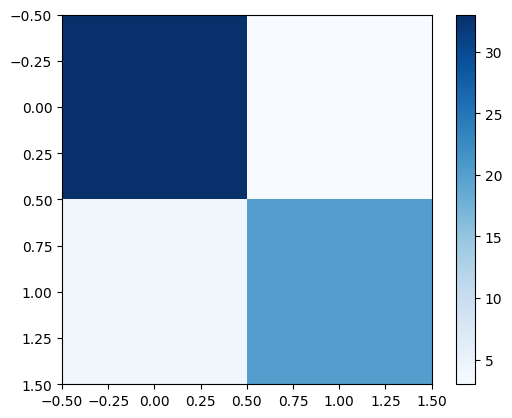

In [10]:
gaussianNB_confusion_matrix = confusion_matrix(y_test, pred_test_gaussianNB_model)
plt.imshow(gaussianNB_confusion_matrix, cmap='Blues')
plt.colorbar()
plt.show()

# Training Model
- Train KNeighborsClassifier Model

In [11]:
kneighbors_model = KNeighborsClassifier(n_neighbors=10)
kneighbors_model.fit(x_train,y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
pred_train_kneighbors_model = kneighbors_model.predict(x_train)
pred_test_kneighbors_model = kneighbors_model.predict(x_test)

# Evaluate KNeighborsClassifier Model
- This section calculates Key performance metrics of the KNeighborsClassifier Model:
- Accuracy: Overall correctness of the model predictions
- Precision: Correctness of positive predictions
- Recall: Ability to identify all positive instances
- The results help to assess how well the model performs on unseen test data.

In [13]:
accuracy_train_kneighbors = accuracy_score(y_train, pred_train_kneighbors_model)
accuracy_test_kneighbors = accuracy_score(y_test, pred_test_kneighbors_model)
print('accuracy_train_kneighbors: ', accuracy_train_kneighbors)
print('accuracy_test_kneighbors: ', accuracy_test_kneighbors)
precision_train_kneighbors = precision_score(y_train,pred_train_kneighbors_model)
precision_test_kneighbors = precision_score(y_test, pred_test_kneighbors_model)
print('precision_train_kneighbors: ', precision_train_kneighbors)
print('precision_test_kneighbors: ', precision_test_kneighbors)
recall_train_kneighbors = recall_score(y_train, pred_train_kneighbors_model)
recall_test_kneighbors = recall_score(y_test, pred_test_kneighbors_model)
print('recall_train_kneighbors: ', recall_train_kneighbors)
print('recall_test_kneighbors: ', recall_test_kneighbors)

accuracy_train_kneighbors:  0.8481012658227848
accuracy_test_kneighbors:  0.8666666666666667
precision_train_kneighbors:  0.9139784946236559
precision_test_kneighbors:  0.8636363636363636
recall_train_kneighbors:  0.7522123893805309
recall_test_kneighbors:  0.7916666666666666


# Confusion Matrix
- Visualize model performance with TP, TN , FP , FN
- Helps identify strengths and weaknesses in predictions

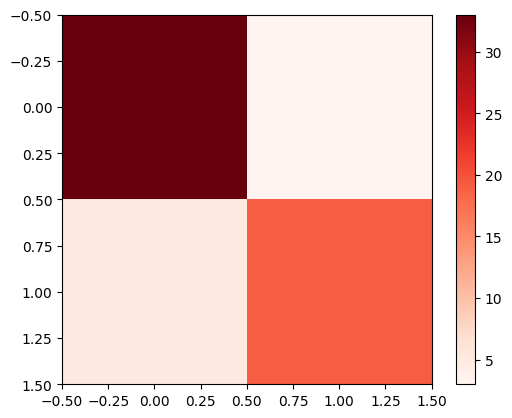

In [14]:
kneighbors_confusion_matrix = confusion_matrix(y_test, pred_test_kneighbors_model)
plt.imshow(kneighbors_confusion_matrix, cmap='Reds')
plt.colorbar()
plt.show()

# Training Model
- Train DecisionTreeClassifier Model

In [15]:
decisionTree_model = DecisionTreeClassifier(max_depth=5 , min_samples_split=3, min_samples_leaf=1 , splitter='best',
                                           max_features='sqrt')
decisionTree_model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
pred_train_decisionTree_model = decisionTree_model.predict(x_train)
pred_test_decisionTree_model = decisionTree_model.predict(x_test)

# Evaluate DecisionTreeClassifier Model
- This section calculates Key performance metrics of the DecisionTreeClassifier Model:
- Accuracy: Overall correctness of the model predictions
- Precision: Correctness of positive predictions
- Recall: Ability to identify all positive instances
- The results help to assess how well the model performs on unseen test data.

In [17]:
accuracy_train_decisionTree = accuracy_score(y_train, pred_train_decisionTree_model)
accuracy_test_decisionTree = accuracy_score(y_test, pred_test_decisionTree_model)
print('accuracy_train_decisionTree: ', accuracy_train_decisionTree)
print('accuracy_test_decisionTree: ', accuracy_test_decisionTree)
precision_train_decisionTree = precision_score(y_train, pred_train_decisionTree_model)
precision_test_decisionTree = precision_score(y_test, pred_test_decisionTree_model)
print('precision_train_decisionTree: ', precision_train_decisionTree)
print('precision_test_decisionTree: ', precision_test_decisionTree)
recall_train_decisionTree = recall_score(y_train, pred_train_decisionTree_model)
recall_test_decisionTree = recall_score(y_test, pred_test_decisionTree_model)
print('recall_train_decisionTree: ', recall_train_decisionTree)
print('recall_test_decisionTree: ', recall_test_decisionTree)

accuracy_train_decisionTree:  0.8860759493670886
accuracy_test_decisionTree:  0.7833333333333333
precision_train_decisionTree:  0.9574468085106383
precision_test_decisionTree:  0.8235294117647058
recall_train_decisionTree:  0.7964601769911505
recall_test_decisionTree:  0.5833333333333334


# Confusion Matrix
- Visualize model performance with TP, TN , FP , FN
- Helps identify strengths and weaknesses in predictions

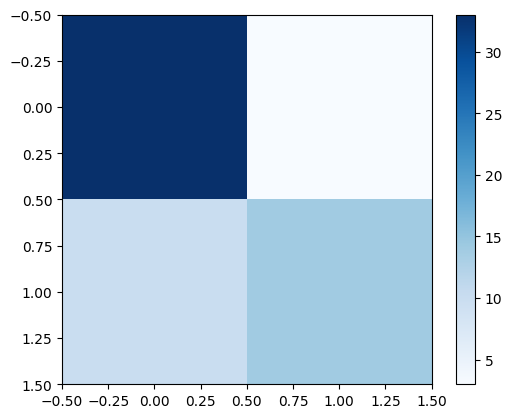

In [18]:
decisionTree_confusion_matrix = confusion_matrix(y_test, pred_test_decisionTree_model)
plt.imshow(decisionTree_confusion_matrix, cmap='Blues')
plt.colorbar()
plt.show()

# Training Model
- Train LogisticRegression Model

In [19]:
logisticRegression_model = LogisticRegression()
logisticRegression_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
pred_train_logistic_regression_model = logisticRegression_model.predict(x_train)
pred_test_logistic_regression_model = logisticRegression_model.predict(x_test)

# Evaluate LogisticRegression Model
- This section calculates Key performance metrics of the LogisticRegression Model:
- Accuracy: Overall correctness of the model predictions
- Precision: Correctness of positive predictions
- Recall: Ability to identify all positive instances
- The results help to assess how well the model performs on unseen test data.

In [21]:
accuracy_train_logisticRegression = accuracy_score(y_train, pred_train_logistic_regression_model)
accuracy_test_logisticRegression = accuracy_score(y_test, pred_test_logistic_regression_model)
print('accuracy_train_logisticRegression: ', accuracy_train_logisticRegression)
print('accuracy_test_logisticRegression: ', accuracy_test_logisticRegression)
precision_train_logisticRegression = precision_score(y_train, pred_train_logistic_regression_model)
precision_test_logisticRegression = precision_score(y_test, pred_test_logistic_regression_model)
print('precision_train_logisticRegression: ', precision_train_logisticRegression)
print('precision_test_logisticRegression: ', precision_test_logisticRegression)
recall_train_logisticRegression = recall_score(y_train, pred_train_logistic_regression_model)
recall_test_logisticRegression = recall_score(y_test, pred_test_logistic_regression_model)
print('recall_train_logisticRegression: ', recall_train_logisticRegression)
print('recall_test_logisticRegression: ', recall_test_logisticRegression)

accuracy_train_logisticRegression:  0.8354430379746836
accuracy_test_logisticRegression:  0.8833333333333333
precision_train_logisticRegression:  0.8425925925925926
precision_test_logisticRegression:  0.84
recall_train_logisticRegression:  0.8053097345132744
recall_test_logisticRegression:  0.875


# Confusion Matrix
- Visualize model performance with TP, TN , FP , FN
- Helps identify strengths and weaknesses in predictions

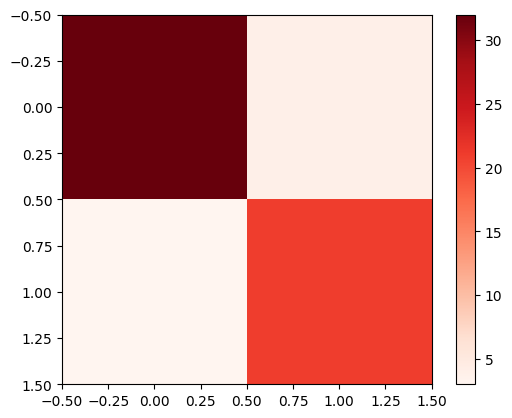

In [22]:
logisticRegression_confusion_matrix = confusion_matrix(y_test, pred_test_logistic_regression_model)
plt.imshow(logisticRegression_confusion_matrix, cmap='Reds')
plt.colorbar()
plt.show()

# Traning Model
- Train Support Vector Machine Model

In [23]:
supportVector_model = SVC(kernel='linear', gamma='auto')
supportVector_model.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [24]:
pred_train_supportVector_model = supportVector_model.predict(x_train)
pred_test_supportVector_model = supportVector_model.predict(x_test)

# Evaluate Support Vector Machine Model
- This section calculates Key performance metrics of the Support Vector Machine Model:
- Accuracy: Overall correctness of the model predictions
- Precision: Correctness of positive predictions
- Recall: Ability to identify all positive instances
- The results help to assess how well the model performs on unseen test data.

In [25]:
accuracy_train_supportVector = accuracy_score(y_train, pred_train_supportVector_model)
accuracy_test_supportVector = accuracy_score(y_test, pred_test_supportVector_model)
print('accuracy_train_supportVector: ', accuracy_train_supportVector)
print('accuracy_test_supportVector: ', accuracy_test_supportVector)
precision_train_supportVector = precision_score(y_train, pred_train_supportVector_model)
precision_test_supportVector = precision_score(y_test, pred_test_supportVector_model)
print('precision_train_supportVector: ', precision_train_supportVector)
print('precision_test_supportVector: ', precision_test_supportVector)
recall_train_supportVector = recall_score(y_train, pred_train_supportVector_model)
recall_test_supportVector = recall_score(y_test, pred_test_supportVector_model)
print('recall_train_supportVector: ', recall_train_supportVector)
print('recall_test_supportVector: ', recall_test_supportVector)

accuracy_train_supportVector:  0.8396624472573839
accuracy_test_supportVector:  0.8833333333333333
precision_train_supportVector:  0.8571428571428571
precision_test_supportVector:  0.8695652173913043
recall_train_supportVector:  0.7964601769911505
recall_test_supportVector:  0.8333333333333334


# Confusion Matrix
- Visualize model performance with TP, TN , FP , FN
- Helps identify strengths and weaknesses in predictions

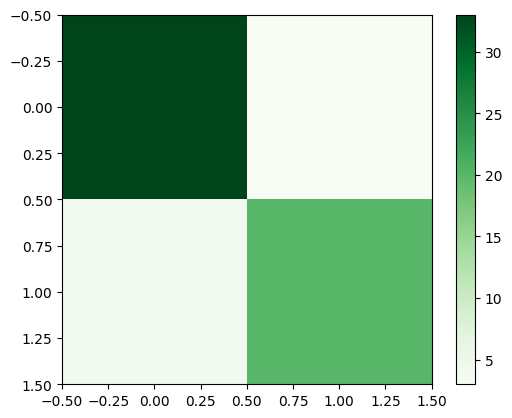

In [26]:
supportVector_confusion_matrix = confusion_matrix(y_test, pred_test_supportVector_model)
plt.imshow(supportVector_confusion_matrix, cmap='Greens')
plt.colorbar()
plt.show()

# Training Model
- Train Neural Network Model

In [27]:
neuralNetwork_model = MLPClassifier(hidden_layer_sizes=250 , max_iter=210 , activation='relu', batch_size='auto')
neuralNetwork_model.fit(x_train,y_train)

/home/jaihon/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (210) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,250
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,210
,shuffle,True
,random_state,None


In [28]:
pred_train_neuralNetwork_model = neuralNetwork_model.predict(x_train)
pred_test_neuralNetwork_model = neuralNetwork_model.predict(x_test)

# Evaluate NeuralNetwork Model
- This section calculates Key performance metrics of the NeuralNetwork Model:
- Accuracy: Overall correctness of the model predictions
- Precision: Correctness of positive predictions
- Recall: Ability to identify all positive instances
- The results help to assess how well the model performs on unseen test data.

In [29]:
accuracy_train_neuralNetwork = accuracy_score(y_train, pred_train_neuralNetwork_model)
accuracy_test_neuralNetwork = accuracy_score(y_test, pred_test_neuralNetwork_model)
print('accuracy_train_neuralNetwork: ', accuracy_train_neuralNetwork)
print('accuracy_test_neuralNetwork: ', accuracy_test_neuralNetwork)
precision_train_neuralNetwork = precision_score(y_train, pred_train_neuralNetwork_model)
precision_test_neuralNetwork = precision_score(y_test, pred_test_neuralNetwork_model)
print('precision_train_neuralNetwork: ', precision_train_neuralNetwork)
print('precision_test_neuralNetwork: ', precision_test_neuralNetwork)
recall_train_neuralNetwork = recall_score(y_train, pred_train_neuralNetwork_model)
recall_test_neuralNetwork = recall_score(y_test, pred_test_neuralNetwork_model)
print('recall_train_neuralNetwork: ', recall_train_neuralNetwork)
print('recall_test_neuralNetwork: ', recall_test_neuralNetwork)

accuracy_train_neuralNetwork:  0.9620253164556962
accuracy_test_neuralNetwork:  0.8666666666666667
precision_train_neuralNetwork:  0.9814814814814815
precision_test_neuralNetwork:  0.8636363636363636
recall_train_neuralNetwork:  0.9380530973451328
recall_test_neuralNetwork:  0.7916666666666666


# Confusion Matrix
- Visualize model performance with TP, TN , FP , FN
- Helps identify strengths and weaknesses in predictions

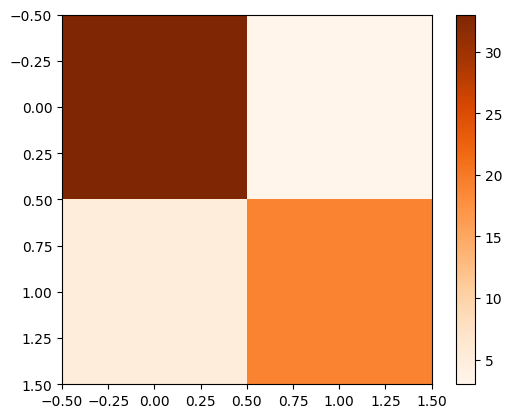

In [30]:
neuralNetwork_confusion_matrix = confusion_matrix(y_test, pred_test_neuralNetwork_model)
plt.imshow(neuralNetwork_confusion_matrix, cmap='Oranges')
plt.colorbar()
plt.show()

# Training Model
- Train Extreme Gradient Boosting Model

In [31]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [32]:
pred_train_xgboost_model = xgboost_model.predict(x_train)
pred_test_xgboost_model = xgboost_model.predict(x_test)

# Evaluate Extreme Gradient Boosting Model
- This section calculates Key performance metrics of the Extreme Gradient Boosting Model:
- Accuracy: Overall correctness of the model predictions
- Precision: Correctness of positive predictions
- Recall: Ability to identify all positive instances
- The results help to assess how well the model performs on unseen test data.

In [33]:
accuracy_train_xgboost = accuracy_score(y_train, pred_train_xgboost_model)
accuracy_test_xgboost = accuracy_score(y_test, pred_test_xgboost_model)
print('accuracy_train_xgboost: ', accuracy_train_xgboost)
print('accuracy_test_xgboost: ', accuracy_test_xgboost)
precision_train_xgboost = precision_score(y_train, pred_train_xgboost_model)
precision_test_xgboost = precision_score(y_test, pred_test_xgboost_model)
print('precision_train_xgboost: ', precision_train_xgboost)
print('precision_test_xgboost: ', precision_test_xgboost)
recall_train_xgboost = recall_score(y_train, pred_train_xgboost_model)
recall_test_xgboost = recall_score(y_test, pred_test_xgboost_model)
print('recall_train_xgboost: ', recall_train_xgboost)
print('recall_test_xgboost: ', recall_test_xgboost)

accuracy_train_xgboost:  1.0
accuracy_test_xgboost:  0.8333333333333334
precision_train_xgboost:  1.0
precision_test_xgboost:  0.75
recall_train_xgboost:  1.0
recall_test_xgboost:  0.875


# Confusion Matrix
- Visualize model performance with TP, TN , FP , FN
- Helps identify strengths and weaknesses in predictions

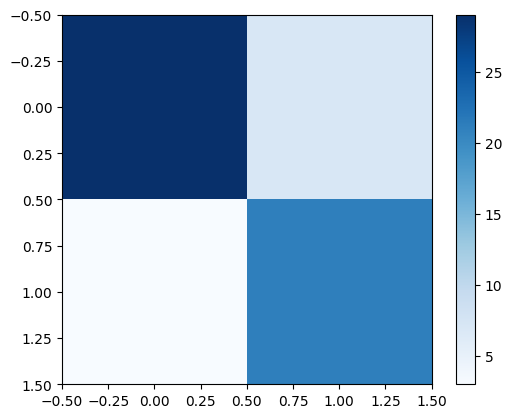

In [34]:
xgboost_confusion_matrix = confusion_matrix(y_test, pred_test_xgboost_model)
plt.imshow(xgboost_confusion_matrix, cmap='Blues')
plt.colorbar()
plt.show()

# Compare All Models
- Compare Accuracy of all models
- use bar charts or bar charts to visualize performance
- Helps identify the best models for deployment

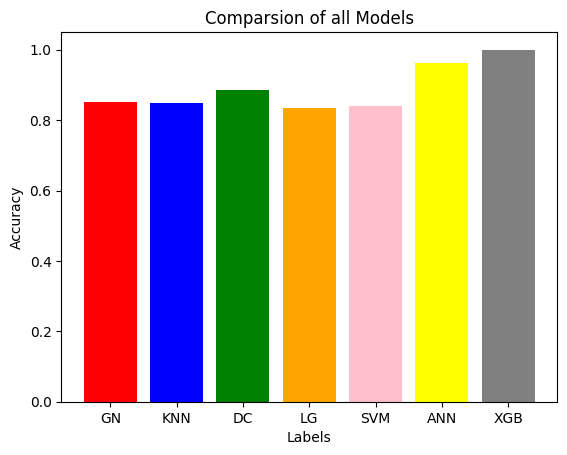

In [35]:
label_charts_list = ['GN','KNN','DC','LG','SVM','ANN','XGB']
all_accuracy_models = [accuracy_train_gaussianNB, accuracy_train_kneighbors,accuracy_train_decisionTree,
                      accuracy_train_logisticRegression,accuracy_train_supportVector,accuracy_train_neuralNetwork,
                      accuracy_train_xgboost]
colors = ['red','blue','green','orange','pink','yellow','gray']
plt.bar(label_charts_list, all_accuracy_models, color=colors)
plt.title('Comparsion of all Models')
plt.xlabel('Labels')
plt.ylabel('Accuracy')
plt.show()

# Compare All Models
- Compare Precision of all models
- use bar charts or bar charts to visualize performance
- Helps identify the best models for deployment

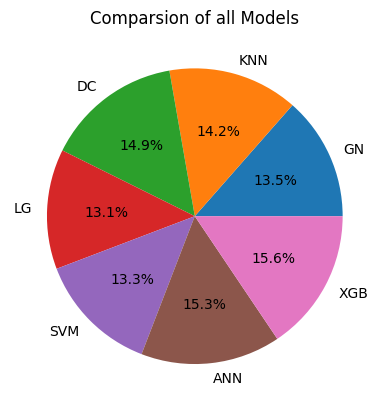

In [36]:
label_charts_list = ['GN','KNN','DC','LG','SVM','ANN','XGB']
all_precision_models = [precision_train_gaussianNB, precision_train_kneighbors,precision_train_decisionTree,
                      precision_train_logisticRegression,precision_train_supportVector,precision_train_neuralNetwork,
                      precision_train_xgboost]

plt.title('Comparsion of all Models')
plt.pie(all_precision_models,labels=label_charts_list, autopct='%1.1F%%')
plt.show()

# Compare All Models
- Compare Recall of all models
- use bar charts or bar charts to visualize performance
- Helps identify the best models for deployment

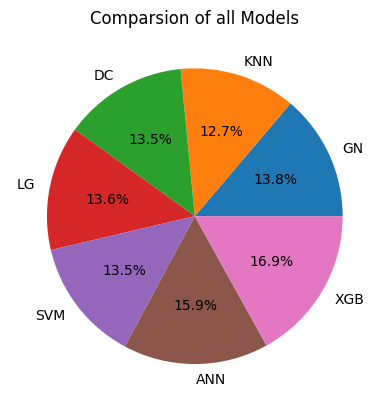

In [37]:
label_charts_list = ['GN','KNN','DC','LG','SVM','ANN','XGB']
all_recall_models = [recall_train_gaussianNB, recall_train_kneighbors,recall_train_decisionTree,
                      recall_train_logisticRegression,recall_train_supportVector,recall_train_neuralNetwork,
                      recall_train_xgboost]

plt.title('Comparsion of all Models')
plt.pie(all_recall_models,labels=label_charts_list, autopct='%1.1F%%')
plt.show()

# Save Trained Models Using Pickle
- This section saves the trained machine learning models into .pkl filse
- using Python's
- pickle module.
- These files can later be loaded and used
- without retraining, enabling quick deployment or futher analysis

## Example usage:
- load the model
- import pickle
- with open("neuralNetwork_model.pkl","rb") as file:
-          loaded_model = pickle.load(file)
- Make predictions:
- loaded_model.predict(x_test)

In [39]:
with open('neuralNetwork_model.pkl','wb') as demo:
          pickle.dump(neuralNetwork_model, demo)

with open('supportVector_model.pkl','wb') as demo1:
          pickle.dump(supportVector_model, demo1)

with open('decisionTree_model.pkl','wb') as demo2:
          pickle.dump(decisionTree_model, demo2)

with open('logisticRegression_model.pkl','wb') as demo3:
          pickle.dump(logisticRegression_model, demo3)

with open('kneighbors_model.pkl','wb') as demo4:
          pickle.dump(kneighbors_model, demo4)